In [45]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import subprocess
import scipy as sc
from itertools import product

mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "axes.labelsize": 12,
    "font.size": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "figure.figsize": (4, 3.5),
    "text.latex.preamble": "\n".join([
        r"\usepackage[utf8]{inputenc}",
        r"\usepackage[T1]{fontenc}",
        r"\usepackage[detect-all,locale=FR]{siunitx}",
    ]),
    'lines.markersize': 10,
    'lines.color': 'grey',
    'scatter.marker': '+',
    'errorbar.capsize': 3,
    'savefig.bbox': 'tight',
})

In [46]:
path = '../'
executable = 'bin/ex2'
export_path = path + 'rapport/figures/'
data_path = 'data/'
config_path = 'bin/'
config_name = 'retraction'
config_ext = '.conf'

In [47]:
def stringify_dict(d: dict, sep=',') -> str:
    return sep.join(map(lambda a: str(a[0]) + "=" + str(a[1]), tuple(d.items())))

In [48]:
def run(config_file: str, output_file: str, params: dict = {}) -> None:
    # print(f"Running with config file {config_file}")
    options = stringify_dict(params, sep=' ')
    cmd = f"{path}{executable} {path}{config_file} output='{path}{output_file}' {options}"
    print(f"Running command `{cmd}`")
    subprocess.run(cmd, shell=True, stdout=subprocess.DEVNULL)
    # print("Done")

In [49]:
# nsteps = np.array([*range(500, 2001, 100)])
nsteps = np.linspace(1000, 10000, 100)
nsimul = len(nsteps)  # Number of simulations to perform

conf = {}
with open(path + config_path + config_name + config_ext, 'r') as f:
    lines = f.read().split('\n')

for line in lines:
    if not line:
        continue
    name, _, val, *_ = line.split(' ')
    name = name.strip()
    val = val.strip()
    try:
        conf[name] = float(val)
    except ValueError:
        conf[name] = val

# Vérfier bon tFin
assert 0.96 * conf['L'] / abs(conf['alpha']) == conf['tFin']
dt = conf['tFin'] / nsteps

In [50]:
%%bash
cd .. && make clean && make

clang++ -o bin/ex2 src/Ex2_2024_student.cpp -std=c++17 -Wall -Wextra -O2 


In [51]:
params_variations = {
    'nsteps': nsteps,
}
all_params = tuple(
    {a: b for a, b in zip(params_variations.keys(), c)} for c in product(*params_variations.values())
)

# Run simulations
outputs = []  # List to store output file names
for params in all_params:
    output_file = f"{data_path}{config_name},{stringify_dict(params)}.out"
    outputs.append(output_file)
    run(f'{config_path}{config_name}{config_ext}', output_file, params)

Running command `../bin/ex2 ../bin/retraction.conf output='../data/retraction,nsteps=1000.0.out' nsteps=1000.0`
Running command `../bin/ex2 ../bin/retraction.conf output='../data/retraction,nsteps=1090.909090909091.out' nsteps=1090.909090909091`
Running command `../bin/ex2 ../bin/retraction.conf output='../data/retraction,nsteps=1181.8181818181818.out' nsteps=1181.8181818181818`
Running command `../bin/ex2 ../bin/retraction.conf output='../data/retraction,nsteps=1272.7272727272727.out' nsteps=1272.7272727272727`
Running command `../bin/ex2 ../bin/retraction.conf output='../data/retraction,nsteps=1363.6363636363635.out' nsteps=1363.6363636363635`
Running command `../bin/ex2 ../bin/retraction.conf output='../data/retraction,nsteps=1454.5454545454545.out' nsteps=1454.5454545454545`
Running command `../bin/ex2 ../bin/retraction.conf output='../data/retraction,nsteps=1545.4545454545455.out' nsteps=1545.4545454545455`
Running command `../bin/ex2 ../bin/retraction.conf output='../data/retract

In [52]:
# Load stuff in memory
all_data = {}

for file, params in zip(outputs, all_params):
    data = np.loadtxt(path + file)
    all_data[file] = (params, np.copy(data))

# Plots!

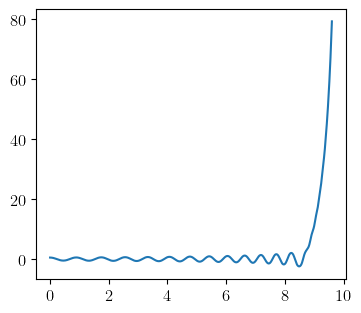

In [53]:
%matplotlib widget
for (params, data) in all_data.values():
    if params['nsteps'] > 1000:
        continue
    t, theta, thetadot, l = data[:,0], data[:,1], data[:,2], data[:,5]
    # x = l * np.sin(theta)
    # y = -l * np.cos(theta)
    # plt.plot(x,y)
    plt.plot(t, theta)

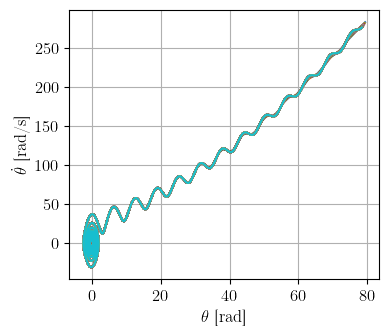

In [54]:
%matplotlib inline
plt.close()
for (params, data) in all_data.values():
    t, theta, thetadot = data[:,0], data[:,1], data[:,2]
    plt.plot(theta    # p = m L^2 thetadot
, thetadot)

# plt.axis('equal')
plt.xlabel(r'$\theta$ [rad]')
plt.ylabel(r'$\dot{\theta}$ [rad/s]')
plt.grid()
# plt.legend()
plt.savefig(export_path + 'feuriste.pdf')

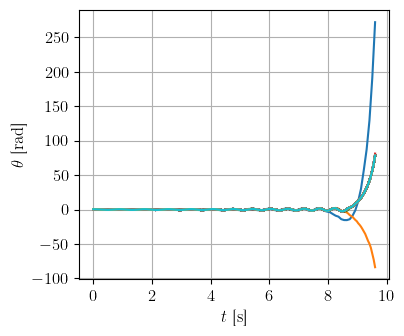

No such comm: 17a0fa3dcccf42bc93d701b89680ffdd


No such comm: 6ae20a8e143d42e5986eff4f9d5f0672


No such comm: 7d24308c5a3b4bc4b7259fe3f4ab98b6


In [ ]:
%matplotlib inline
plt.close()
for (params, data) in all_data.values():
    t, theta, l = data[:,0], data[:,1], data[:,5]
    plt.plot(t, theta)

# plt.axis('equal')
plt.xlabel(r'$t$ [s]')
plt.ylabel(r'$\theta$ [rad]')
plt.grid()
plt.show()
# plt.legend()
# plt.savefig(export_path + 'feuriste.pdf')

[0.0096     0.0088     0.00812308 0.00754286 0.00704    0.0066
 0.00621176 0.00586667 0.00555789 0.00528    0.00502857 0.0048
 0.0045913  0.0044     0.004224   0.00406154 0.00391111 0.00377143
 0.00364138 0.00352    0.00340645 0.0033     0.0032     0.00310588
 0.00301714 0.00293333 0.00285405 0.00277895 0.00270769 0.00264
 0.00257561 0.00251429 0.00245581 0.0024     0.00234667 0.00229565
 0.00224681 0.0022     0.0021551  0.002112   0.00207059 0.00203077
 0.00199245 0.00195556 0.00192    0.00188571 0.00185263 0.00182069
 0.00178983 0.00176    0.00173115 0.00170323 0.00167619 0.00165
 0.00162462 0.0016     0.00157612 0.00155294 0.00153043 0.00150857
 0.00148732 0.00146667 0.00144658 0.00142703 0.001408   0.00138947
 0.00137143 0.00135385 0.00133671 0.00132    0.0013037  0.0012878
 0.00127229 0.00125714 0.00124235 0.00122791 0.00121379 0.0012
 0.00118652 0.00117333 0.00116044 0.00114783 0.00113548 0.0011234
 0.00111158 0.0011     0.00108866 0.00107755 0.00106667 0.001056
 0.00104554 0.001

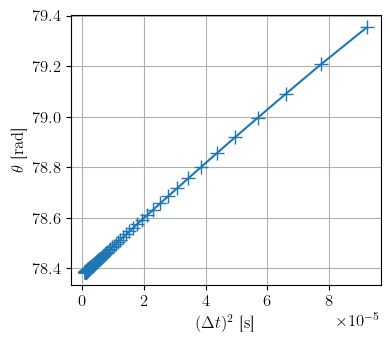

In [56]:
def calc(dataset: dict):
    stuffies = []
    for i, (params, data) in enumerate(dataset.values()):
        tf, thetaf = data[:, 0], data[-1, 1]
        print(tf[1] - tf[0])
        stuffies.append(thetaf)
    return stuffies

norder = 2
print(dt)
stuff = calc(all_data)
plt.plot(dt**norder, stuff, '+-', label=r'$\theta$')
plt.xlabel(r'$(\Delta t)^2$ [s]')
plt.ylabel(r'$\theta$ [rad]')
plt.grid()